In [35]:
import pandas as pd
import seaborn as Sns

In [36]:
t1=pd.read_csv("student_data.csv")
t1.rename(columns={'Roll Number' : 'rollno' , 'Blood Group' : 'Blood_group', 
'Mother Tongue' : 'Mother_Tongue'},inplace=True )
t2=pd.read_csv("Semester1cst.csv")
t1.sort_values("rollno", axis = 0, ascending = True, 
                 inplace = True, na_position ='last') 
t1 = t1.reset_index()
t1 = t1.drop(['index'],axis=1)
t2.sort_values("rollno", axis = 0, ascending = True, 
                 inplace = True, na_position ='last') 
t2 = t2.reset_index()
t2 = t2.drop(['index'],axis=1)
t1.head()

,rollno,Name,Department,Sex,Category,Blood_group,Board,Mother_Tongue,State
0,1401CE01,Hewitt Sissens,CE,M,SC,AB-,TELENGANA STATE BOARD,OR,WB
1,1401CE02,Stacee Whittingham,CE,M,OB,O-,INTERMEDIATE BOARD,GJ,HP
2,1401CE03,Tiffie Jeanon,CE,M,ST,B+,INTERMEDIATE BOARD (A.P),ML,HN
3,1401CE04,Natka Iacivelli,CE,M,GE,O-,BIEAP,HD,WB
4,1401CE05,Derrick Boland,CE,F,PD,A-,TELANGANA STATE BOARD,BH,TN


In [37]:
t1 = t1.loc[t1['rollno'] != '1401CS18']
t1 = t1.reset_index()
t1 = t1.drop(['index'],axis=1)
t2.sort_values("rollno", axis = 0, ascending = True, 
                 inplace = True, na_position ='last') 
t2 = t2.reset_index()
t2 = t2.drop(['index'],axis=1)
t2.head()

,rollno,Branch,SPI1
0,1401CE01,CE,3.000000
1,1401CE02,CE,7.551020
2,1401CE03,CE,8.000000
3,1401CE04,CE,7.122449
4,1401CE05,CE,8.102041


In [38]:
df=pd.concat([t1,t2],axis='columns')
df = df.loc[:,~df.columns.duplicated()]

In [39]:
d1=pd.get_dummies(df.Category)
d2=pd.get_dummies(df.Sex)
d3=pd.get_dummies(df.Department)
#d4=pd.get_dummies(df.Board)
#d5=pd.get_dummies(df.State)
#d6=pd.get_dummies(df.Mother_Tongue)
df=pd.concat([df,d1,d2,d3],axis='columns')
df = df.loc[:,~df.columns.duplicated()]
df = df.loc[df['SPI1'] > 5]
df=df.drop(['rollno', 'Name','Department','Sex','Category','Blood_group','Board','Mother_Tongue','State','Branch'], axis = 1)
y=df['SPI1']
df
#df.corr()
#Trying to avoid the dummy variable trap


,SPI1,GE,OB,PD,SC,ST,F,M,CE,CH,CS,EE,ME
1,7.551020,0,1,0,0,0,0,1,1,0,0,0,0
2,8.000000,0,0,0,0,1,0,1,1,0,0,0,0
3,7.122449,1,0,0,0,0,0,1,1,0,0,0,0
4,8.102041,0,0,1,0,0,1,0,1,0,0,0,0
5,6.734694,1,0,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,6.795918,0,0,1,0,0,0,1,0,0,0,0,1
195,6.469388,1,0,0,0,0,1,0,0,0,0,0,1
196,6.020408,0,0,1,0,0,1,0,0,0,0,0,1
197,6.673469,0,0,0,0,1,1,0,0,0,0,0,1


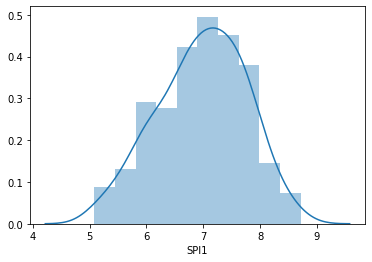

In [40]:
Sns.distplot(df.SPI1)

,SPI1,GE,OB,SC,ST,M,CE,CS,EE,ME
SPI1,1.000000,-0.153133,-0.079558,0.026176,-0.010601,0.003359,-0.057806,0.239151,-0.060998,-0.010514
GE,-0.153133,1.000000,-0.231075,-0.251574,-0.279827,-0.106996,0.124532,-0.081235,-0.134694,0.079747
OB,-0.079558,-0.231075,1.000000,-0.238814,-0.265635,0.067514,-0.002802,-0.027117,-0.051740,0.043200
SC,0.026176,-0.251574,-0.238814,1.000000,-0.289200,0.026573,0.068184,0.076300,0.002861,-0.117287
ST,-0.010601,-0.279827,-0.265635,-0.289200,1.000000,0.015010,-0.092118,0.016660,0.207274,-0.132637
M,0.003359,-0.106996,0.067514,0.026573,0.015010,1.000000,0.026820,0.028607,0.064080,-0.057517
CE,-0.057806,0.124532,-0.002802,0.068184,-0.092118,0.026820,1.000000,-0.201414,-0.183430,-0.183430
CS,0.239151,-0.081235,-0.027117,0.076300,0.016660,0.028607,-0.201414,1.000000,-0.373801,-0.373801
EE,-0.060998,-0.134694,-0.051740,0.002861,0.207274,0.064080,-0.183430,-0.373801,1.000000,-0.340426
ME,-0.010514,0.079747,0.043200,-0.117287,-0.132637,-0.057517,-0.183430,-0.373801,-0.340426,1.000000


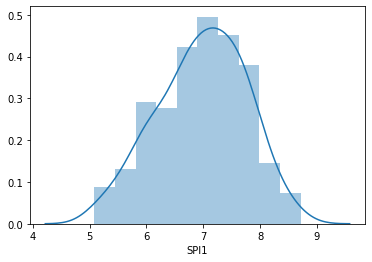

In [41]:
df=df.drop(['PD','F','CH'],axis=1)
df.head()
Sns.distplot(df.SPI1)
df.corr()

In [42]:
df.head(5)
df.drop(['SPI1'],axis=1)

,GE,OB,SC,ST,M,CE,CS,EE,ME
1,0,1,0,0,1,1,0,0,0
2,0,0,0,1,1,1,0,0,0
3,1,0,0,0,1,1,0,0,0
4,0,0,0,0,0,1,0,0,0
5,1,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...
194,0,0,0,0,1,0,0,0,1
195,1,0,0,0,0,0,0,0,1
196,0,0,0,0,0,0,0,0,1
197,0,0,0,1,0,0,0,0,1


In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(df,y,test_size=0.2)
from sklearn import linear_model
model=linear_model.LinearRegression()
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
model.score(X_train,Y_train)

1.0

In [46]:
model.score(X_test,Y_test)

1.0

In [47]:
#model.predict()